In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
%matplotlib inline
from sklearn.metrics import explained_variance_score,r2_score, max_error, mean_absolute_error, median_absolute_error, mean_squared_error
from math import sqrt

In [205]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [206]:
init_notebook_mode(connected=True)
cf.go_offline()

In [207]:
df=pd.read_csv('INDUSTRIALSALT.csv')

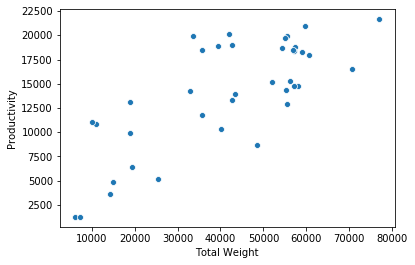

In [208]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [209]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0,38.000000,38.000000,38.000000,33.000000
mean,1249.815789,192285.236842,52.023158,68.454211,41597.684211,0.416316,0.041632,0.0,6.643158,8.651842,14029.382368,16867.257879
std,327.062591,2077.357175,37.489232,54.762439,19054.115749,0.190567,0.019057,0.0,18.375125,17.075428,5645.276495,7434.686007
min,769.000000,190941.000000,0.000000,0.000000,6150.000000,0.060000,0.006000,0.0,0.000000,0.000000,1264.780000,4613.000000
25%,872.250000,191479.000000,5.425000,5.700000,27262.500000,0.270000,0.027000,0.0,0.000000,0.000000,10879.730000,14592.000000
50%,1429.000000,191814.500000,61.315000,70.380000,43125.000000,0.435000,0.043500,0.0,0.000000,0.000000,14778.285000,16034.000000
75%,1529.250000,192203.250000,79.882500,110.055000,56750.000000,0.567500,0.056750,0.0,2.395000,6.312500,18658.890000,17315.370000
max,1640.000000,200833.000000,116.700000,187.300000,77000.000000,0.770000,0.077000,0.0,83.000000,55.330000,21660.480000,54373.000000


In [210]:
df=df[df['Productivity']>2500]
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.0,36.000000,36.00000,36.000000,31.000000
mean,1254.972222,192296.055556,54.913333,72.257222,43537.833333,0.435833,0.043583,0.0,7.012222,9.13250,14738.016111,17008.359677
std,328.563496,2135.171695,36.366328,53.736817,17613.262595,0.175912,0.017591,0.0,18.822256,17.42746,4886.364704,7654.821410
min,769.000000,190941.000000,0.000000,0.000000,10000.000000,0.100000,0.010000,0.0,0.000000,0.00000,3660.580000,4613.000000
25%,851.000000,191466.500000,23.725000,26.722500,33375.000000,0.337500,0.033750,0.0,0.000000,0.00000,11628.425000,14592.000000
50%,1429.000000,191808.000000,67.050000,71.655000,46050.000000,0.465000,0.046500,0.0,0.000000,0.00000,15007.195000,16235.000000
75%,1536.250000,192197.750000,81.112500,111.280000,57000.000000,0.570000,0.057000,0.0,3.595000,9.10750,18724.122500,17350.685000
max,1640.000000,200833.000000,116.700000,187.300000,77000.000000,0.770000,0.077000,0.0,83.000000,55.33000,21660.480000,54373.000000


In [211]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [212]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [213]:
print(lm.intercept_)

7128.094664135161


In [214]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.17914


In [215]:
predictions = lm.predict(X_test)

In [216]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test, predictions))

MAE: 2028.7380048400098
MSE: 7326349.833781946
RMSE: 2706.7230803652496
r2_score: 0.7249745003064398


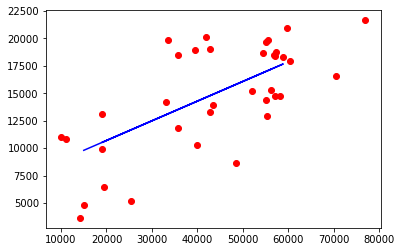

In [217]:
plt.scatter(X,y, color='red')
plt.plot(X_test, predictions,color="blue")

In [218]:
joblib.dump(lm,"Industrial_Salt.pkl")

['Industrial_Salt.pkl']